# K-Means++ Clustering (Country Condition Prediction)

## Penjelasan Kolom

###
- country = Nama negara
- child_mort = Jumlah kematian anak usia di bawah 5 tahun per 1.000 kelahiran hidup
- exports = Persentase nilai ekspor terhadap Produk Domestik Bruto (GDP)
- health = Persentase pengeluaran kesehatan terhadap GDP
- imports = Persentase nilai impor terhadap Produk Domestik Bruto (GDP)
- income = Pendapatan rata-rata per kapita penduduk
- inflation = Tingkat inflasi tahunan suatu negara (dalam persen)
- life_expec = Angka harapan hidup penduduk (dalam tahun)
- total_fer = Total fertility rate, yaitu rata-rata jumlah anak yang dilahirkan oleh seorang wanita
- gdpp = Produk Domestik Bruto per kapita (GDP per capita)

![IndonesiaEmas](lapangankerja.avif)


## A. Data Preparation

### A.1 Import Libraries

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(style='darkgrid', font_scale=1.1)

### A.2 Load Data

In [60]:
try:
    df = pd.read_csv("Country-data.csv")
    print("Berhasil Membaca Data")
except:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [61]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [62]:
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


### A.4 Melihat Informasi Data

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### A.5 Melihat Dimensi Data

In [64]:
df.shape

(167, 10)

### A.6 Cek Data Duplikat

In [65]:
df.duplicated().sum()

np.int64(0)

### A.7 Cek Data Hilang

In [66]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### A.8 Cek Statistik Data

In [67]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
child_mort,167.00,38.27,40.33,2.60,8.25,19.30,62.10,208.00
exports,167.00,41.11,27.41,0.11,23.80,35.00,51.35,200.00
health,167.00,6.82,2.75,1.81,4.92,6.32,8.60,17.90
imports,167.00,46.89,24.21,0.07,30.20,43.30,58.75,174.00
income,167.00,17144.69,19278.07,609.00,3355.00,9960.00,22800.00,125000.00
inflation,167.00,7.78,10.57,-4.21,1.81,5.39,10.75,104.00
life_expec,167.00,70.56,8.89,32.10,65.30,73.10,76.80,82.80
total_fer,167.00,2.95,1.51,1.15,1.79,2.41,3.88,7.49
gdpp,167.00,12964.16,18328.70,231.00,1330.00,4660.00,14050.00,105000.00


### A.9 Cek Outliers Data

<Figure size 1000x800 with 0 Axes>

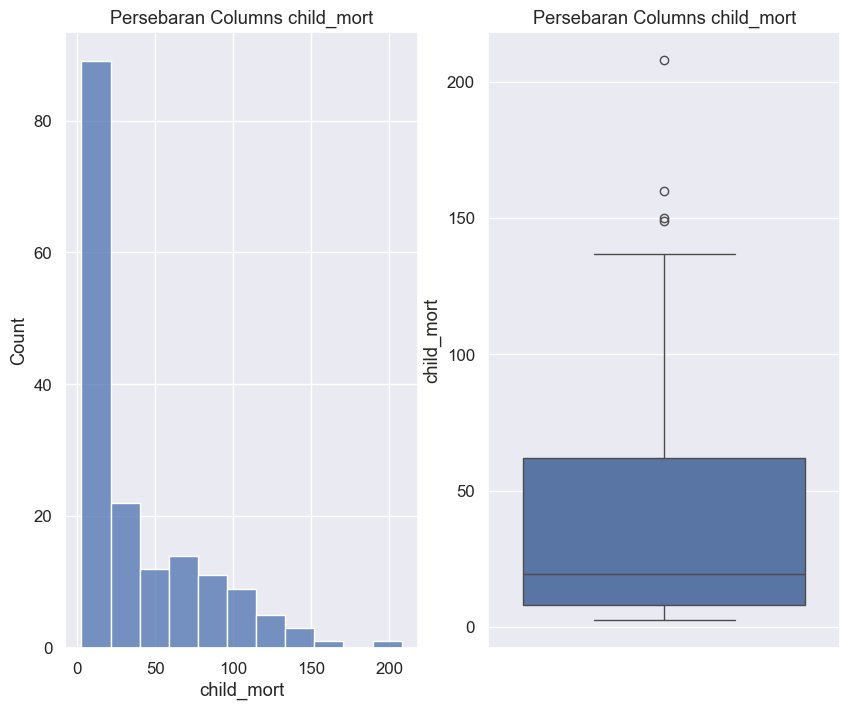

<Figure size 1000x800 with 0 Axes>

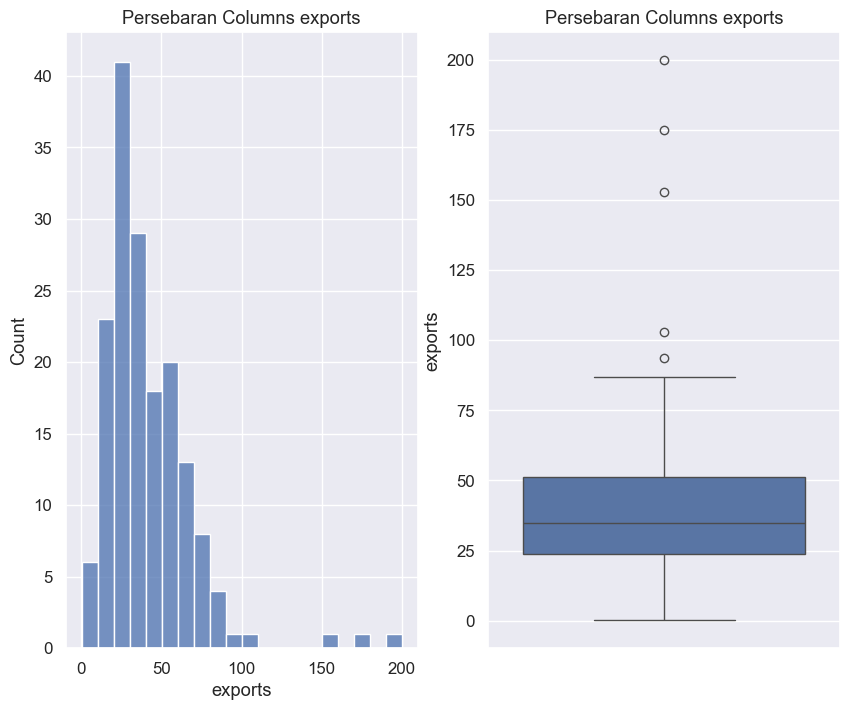

<Figure size 1000x800 with 0 Axes>

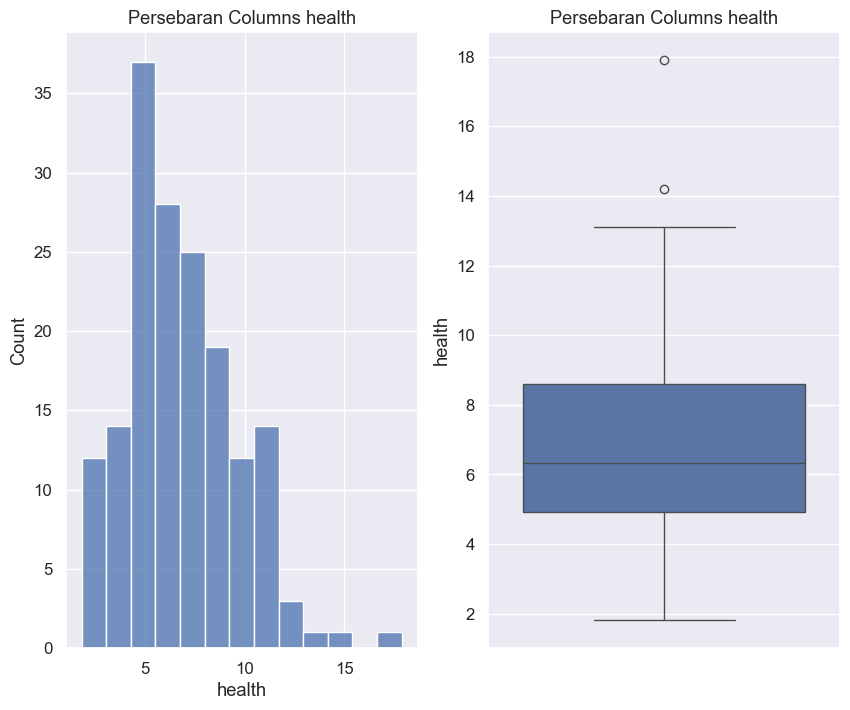

<Figure size 1000x800 with 0 Axes>

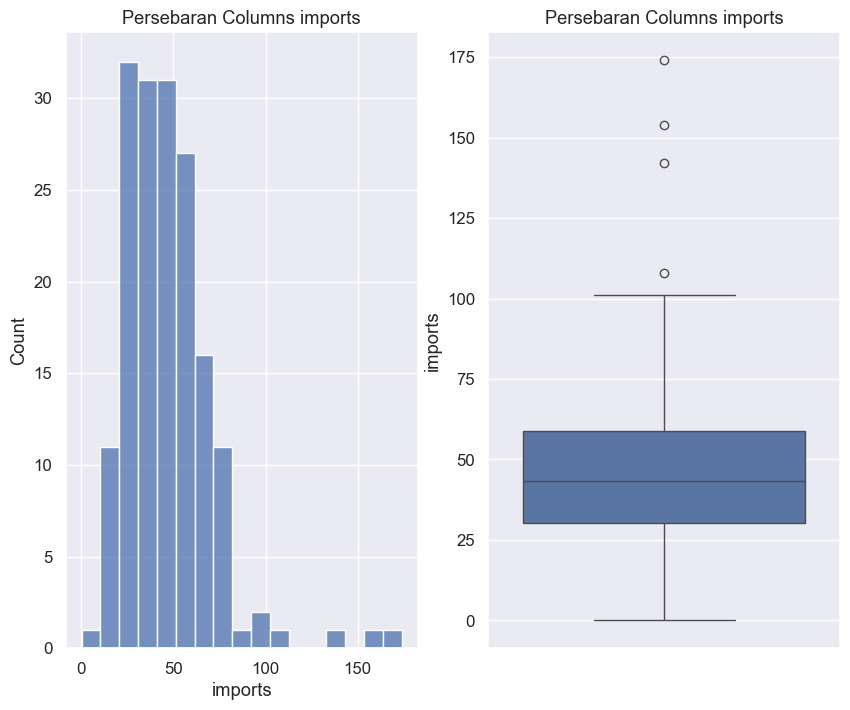

<Figure size 1000x800 with 0 Axes>

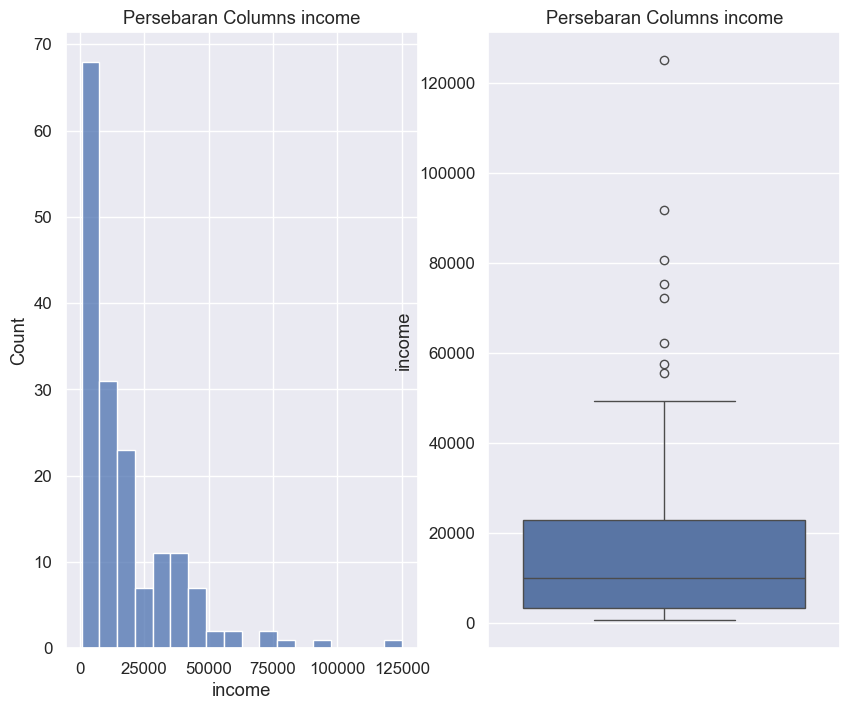

<Figure size 1000x800 with 0 Axes>

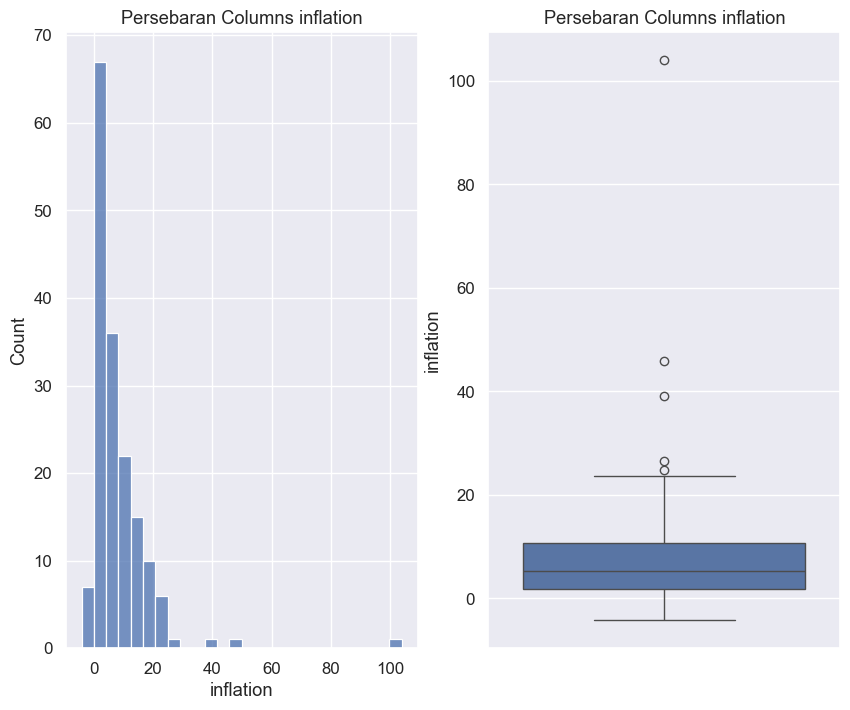

<Figure size 1000x800 with 0 Axes>

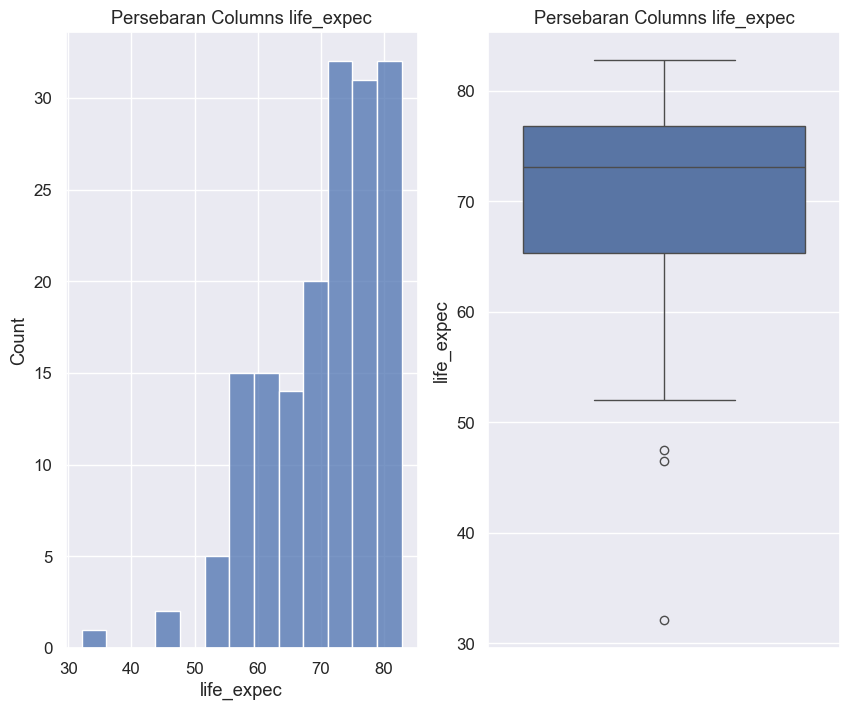

<Figure size 1000x800 with 0 Axes>

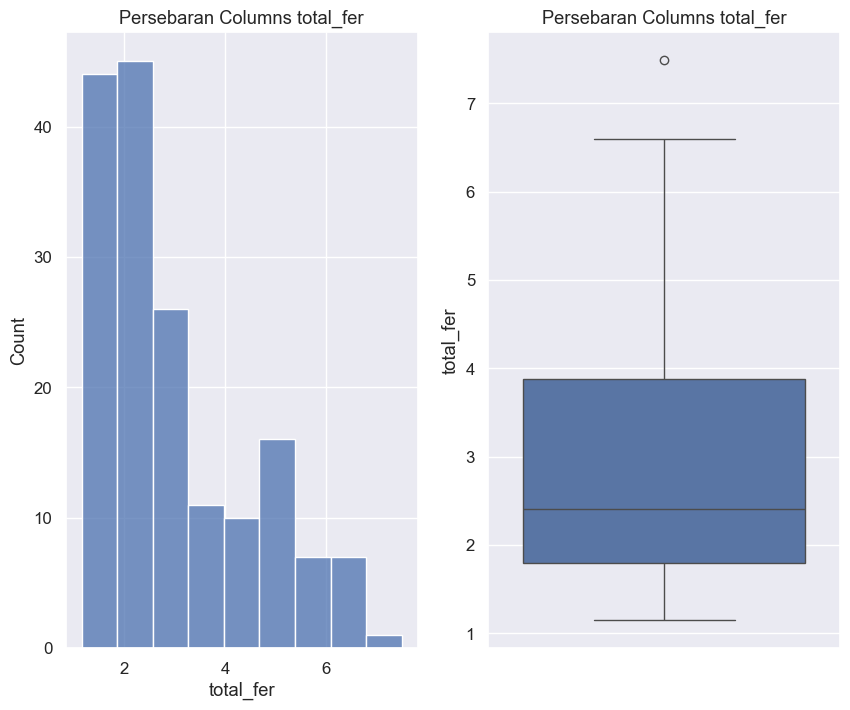

<Figure size 1000x800 with 0 Axes>

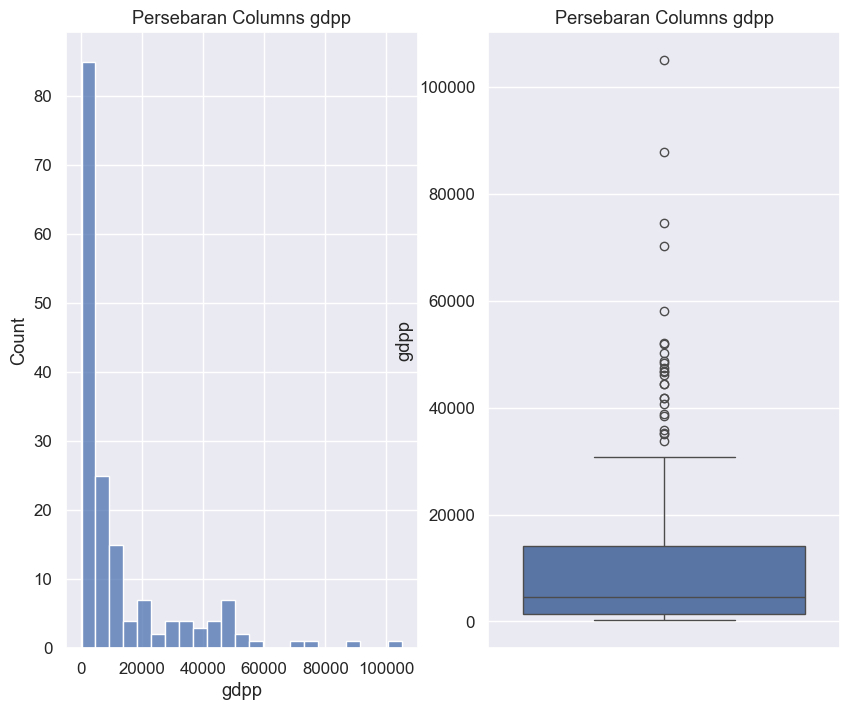

In [68]:
for col in df.select_dtypes(include='number'):
 plt.figure(figsize=(10, 8))
 fig, axes = plt.subplots(1, 2, figsize=(10, 8))
 sns.histplot(df[col], ax = axes[0])
 axes[0].set_title(f"Persebaran Columns {col}")

 sns.boxplot(df[col], ax = axes[1])
 axes[1].set_title(f"Persebaran Columns {col}")


## B. Exploratory Data Analysis

### B.1 Univariate Analysis

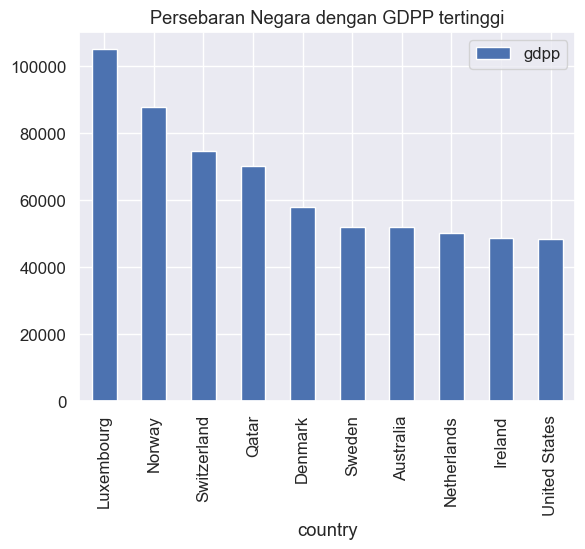

In [69]:
df.sort_values(by='gdpp', ascending=False).head(10).plot(kind='bar', x='country', y='gdpp')
plt.title("Persebaran Negara dengan GDPP tertinggi")
plt.show()

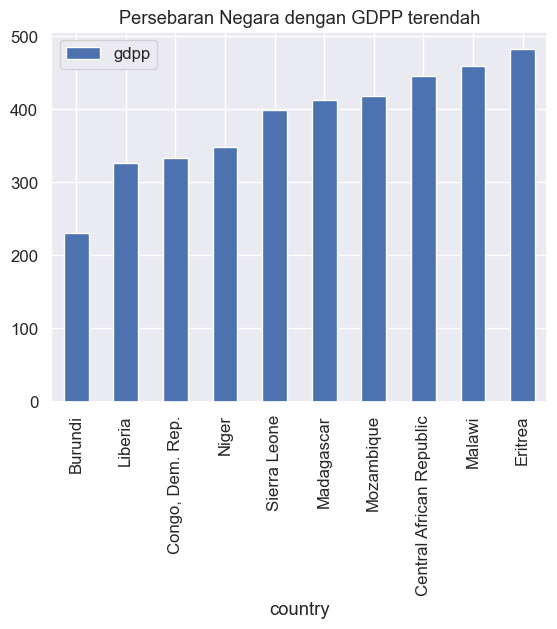

In [70]:
df.sort_values(by='gdpp', ascending=True).head(10).plot(kind='bar', x='country', y='gdpp')
plt.title("Persebaran Negara dengan GDPP terendah")
plt.show()

array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'exports'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'imports'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'inflation'}>],
       [<Axes: title={'center': 'life_expec'}>,
        <Axes: title={'center': 'total_fer'}>,
        <Axes: title={'center': 'gdpp'}>]], dtype=object)

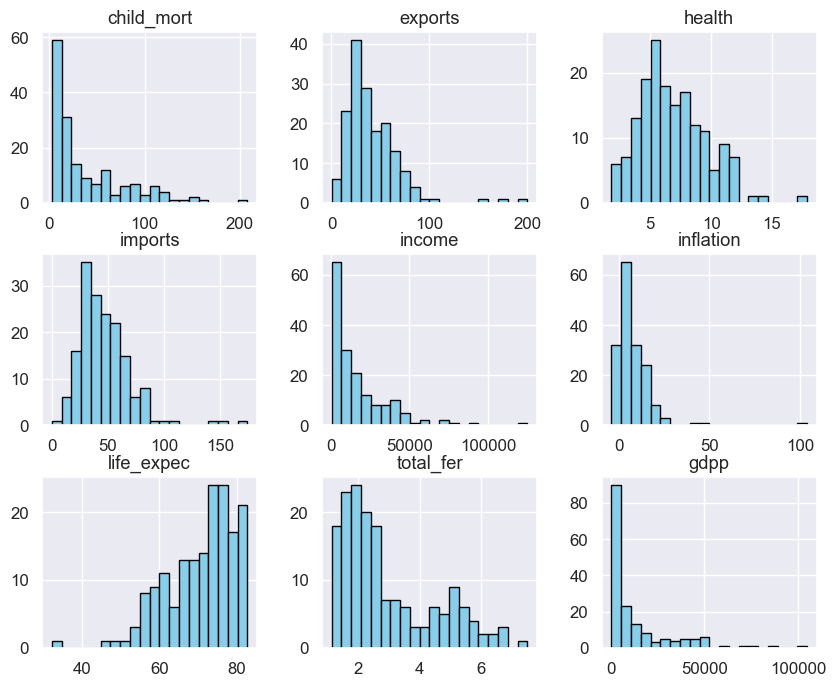

In [71]:
df.select_dtypes(include='number').hist(bins = 20, color='skyblue', edgecolor ='black', figsize = (10, 8))

In [72]:
top_10_Maju = df.sort_values(by='gdpp', ascending=False).head(10)
top_10_Maju

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000
144,Sweden,3.0,46.2,9.63,40.7,42900,0.991,81.5,1.98,52100
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
110,Netherlands,4.5,72.0,11.90,63.6,45500,0.848,80.7,1.79,50300
73,Ireland,4.2,103.0,9.19,86.5,45700,-3.220,80.4,2.05,48700
159,United States,7.3,12.4,17.90,15.8,49400,1.220,78.7,1.93,48400


In [73]:
top_10_mundur = df.sort_values(by='gdpp', ascending=True).head(10)
top_10_mundur

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,25.00,3.77,43.0,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,31.50,5.21,46.2,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446
94,Malawi,90.5,22.80,6.59,34.9,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,4.79,2.66,23.3,1420,11.60,61.7,4.61,482


(array([ 40000.,  60000.,  80000., 100000., 120000.]),
 [Text(40000.0, 0, '40000'),
  Text(60000.0, 0, '60000'),
  Text(80000.0, 0, '80000'),
  Text(100000.0, 0, '100000'),
  Text(120000.0, 0, '120000')])

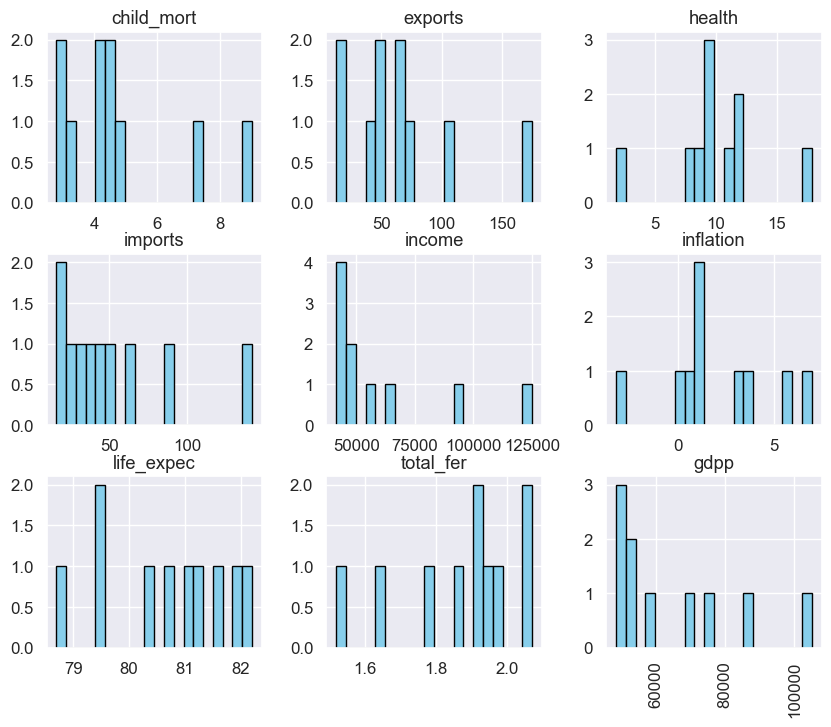

In [74]:
top_10_Maju.hist(bins = 20, color='skyblue', edgecolor ='black', figsize = (10, 8))
plt.xticks(rotation =90)

array([[<Axes: title={'center': 'child_mort'}>,
        <Axes: title={'center': 'exports'}>,
        <Axes: title={'center': 'health'}>],
       [<Axes: title={'center': 'imports'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'inflation'}>],
       [<Axes: title={'center': 'life_expec'}>,
        <Axes: title={'center': 'total_fer'}>,
        <Axes: title={'center': 'gdpp'}>]], dtype=object)

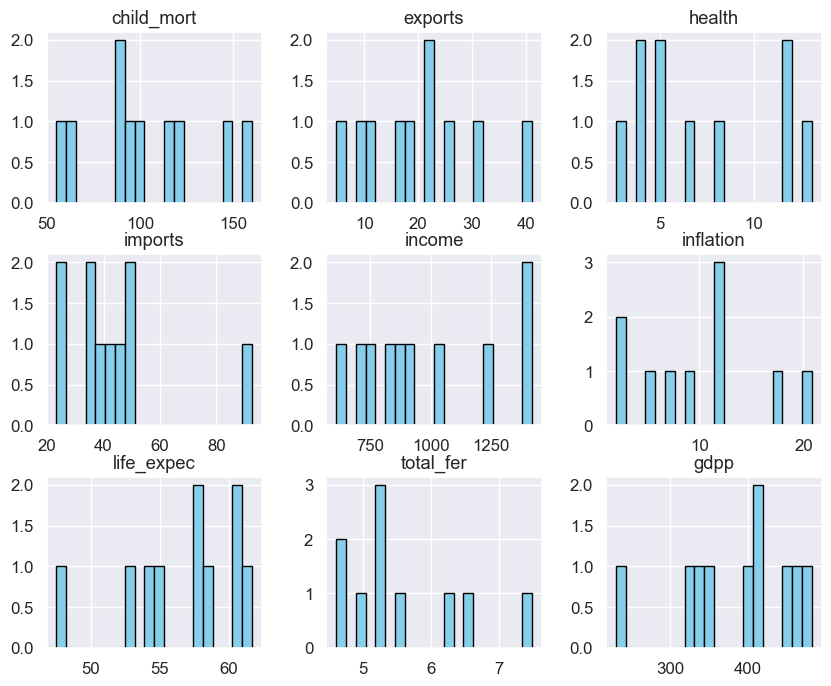

In [75]:
top_10_mundur.hist(bins = 20, color='skyblue', edgecolor ='black', figsize = (10, 8))

In [76]:
top_income_imports = df[['country', 'income', 'imports']].sort_values(by='income', ascending=False).head(10)
print(top_income_imports)

                  country  income  imports
123                 Qatar  125000     23.8
91             Luxembourg   91700    142.0
23                 Brunei   80600     28.0
82                 Kuwait   75200     30.4
133             Singapore   72100    174.0
114                Norway   62300     28.5
157  United Arab Emirates   57600     63.6
145           Switzerland   55500     53.3
159         United States   49400     15.8
73                Ireland   45700     86.5


### B.2 Bivariate Analysis

<Axes: xlabel='income', ylabel='gdpp'>

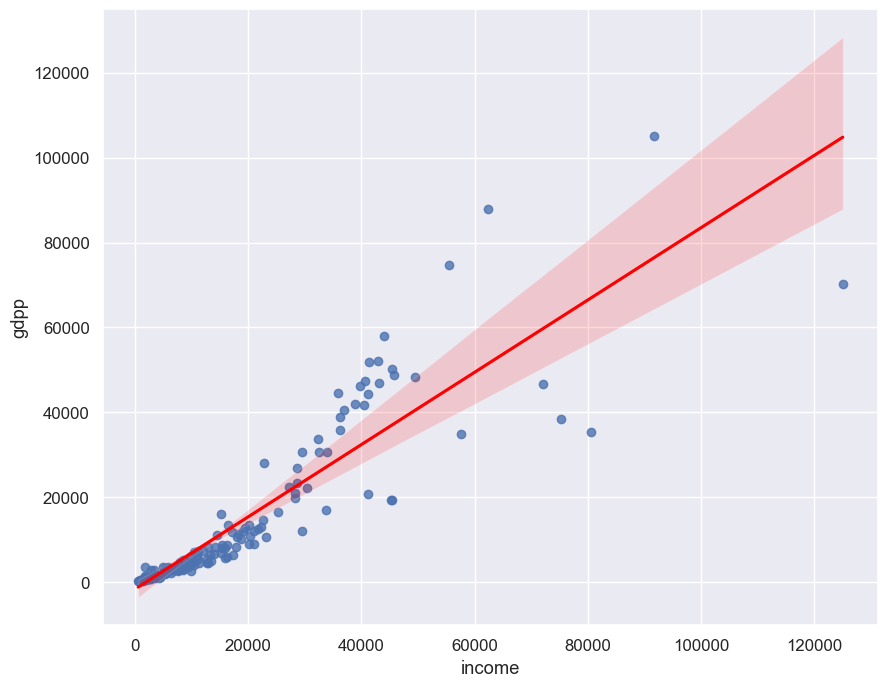

In [77]:
plt.figure(figsize=(10, 8))
sns.regplot(df, x='income', y='gdpp', line_kws={"color" : "red"})

<Axes: xlabel='inflation', ylabel='gdpp'>

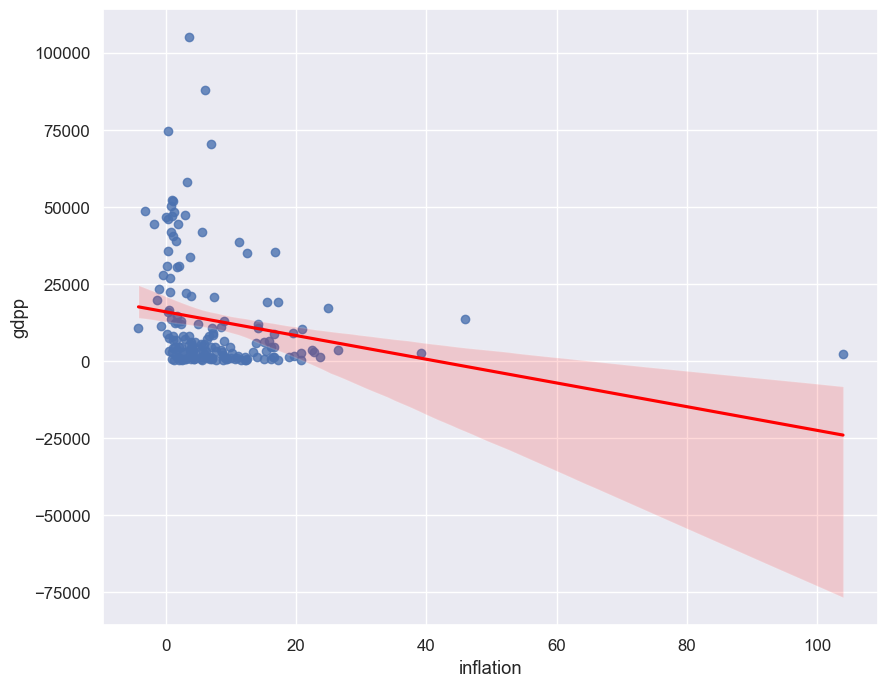

In [78]:
plt.figure(figsize=(10, 8))
sns.regplot(df, x='inflation', y='gdpp', line_kws={"color" : "red"})

<Axes: xlabel='child_mort', ylabel='gdpp'>

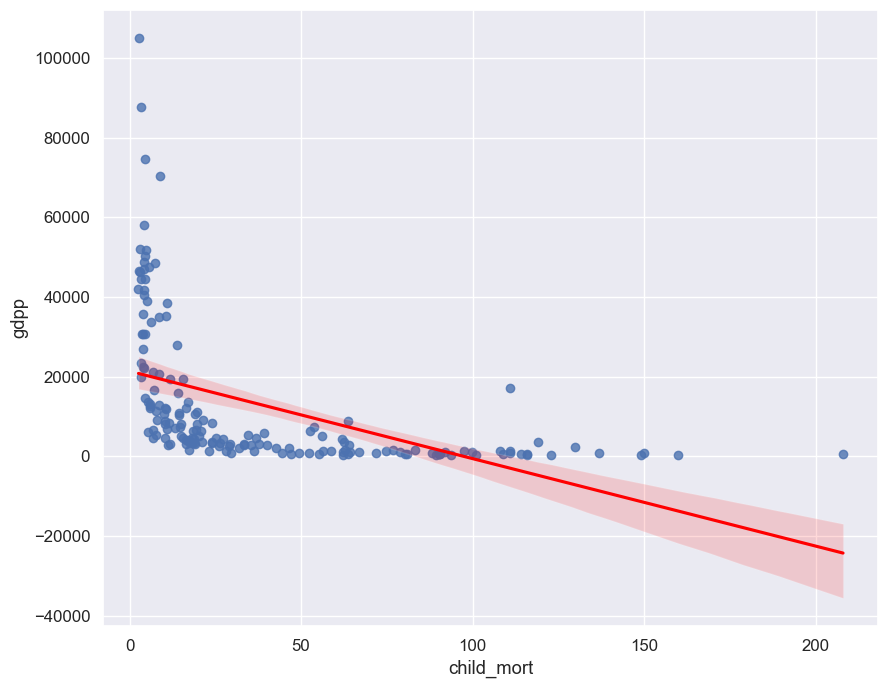

In [79]:
plt.figure(figsize=(10, 8))
sns.regplot(df, x='child_mort', y='gdpp', line_kws={"color" : "red"})

<Axes: xlabel='life_expec', ylabel='gdpp'>

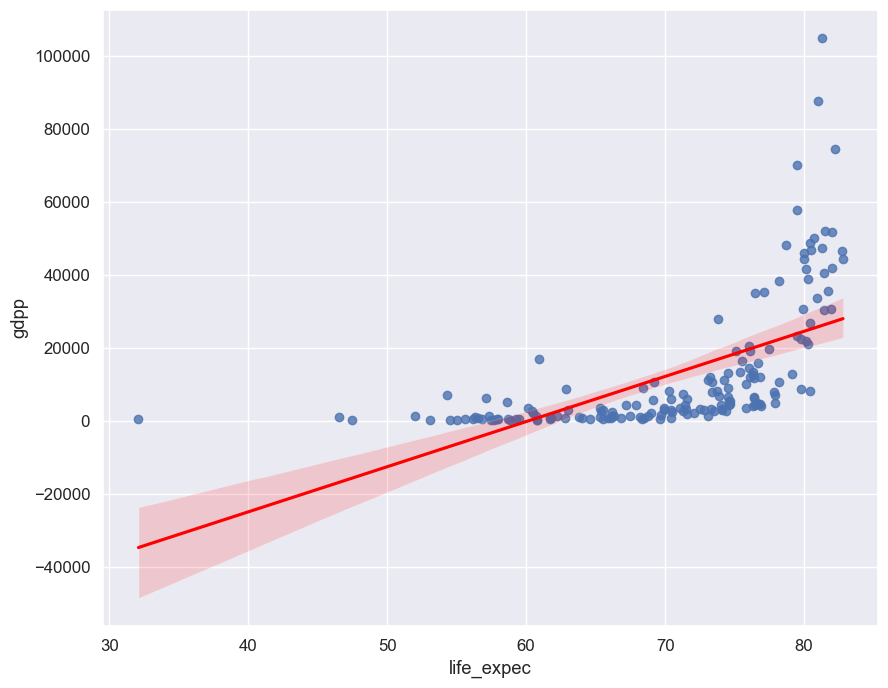

In [80]:
plt.figure(figsize=(10, 8))
sns.regplot(df, x='life_expec', y='gdpp', line_kws={"color" : "red"})

<Axes: xlabel='total_fer', ylabel='gdpp'>

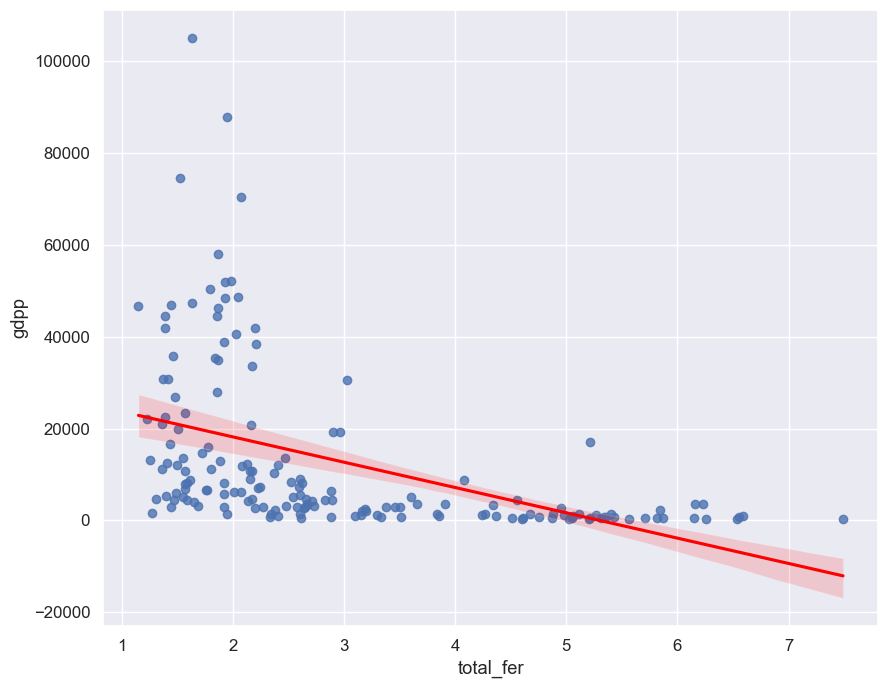

In [81]:
plt.figure(figsize=(10, 8))
sns.regplot(df, x='total_fer', y='gdpp', line_kws={"color" : "red"})

<Axes: xlabel='total_fer', ylabel='income'>

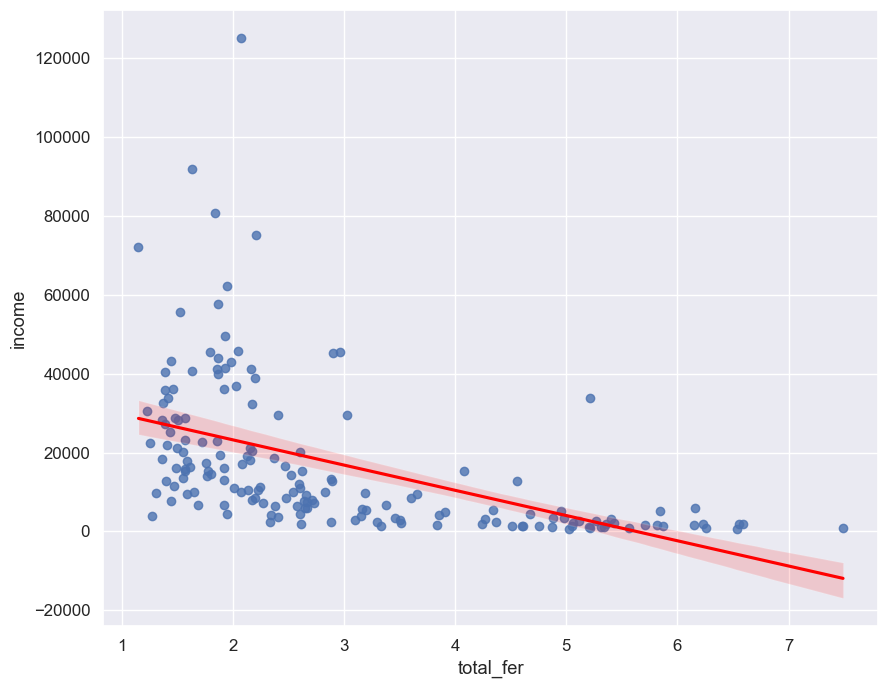

In [82]:
plt.figure(figsize=(10, 8))
sns.regplot(df, x='total_fer', y='income', line_kws={"color" : "red"})

In [83]:
# # Menghitung rasio antara Income dan GDP
# df['wealth_ratio'] = df['income'] / df['gdpp']

# # Lihat negara yang rasionya paling rendah (GDP besar tapi rakyat gak seberapa kaya dibanding produksinya)
# print(df[['country', 'wealth_ratio']].sort_values(by='wealth_ratio').head(5))

### B.3 Multivariate Analysis

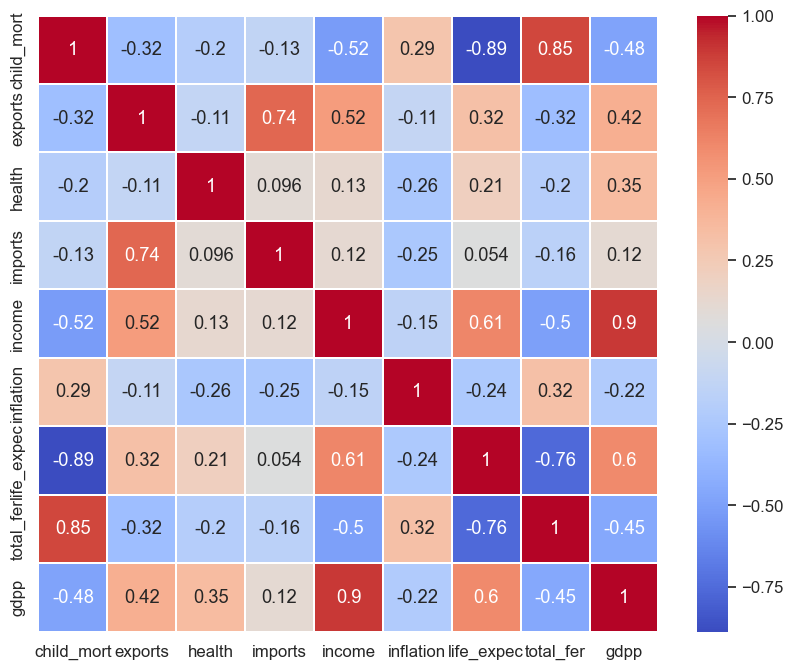

In [84]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            cmap='coolwarm',
            linewidths=1.1)
plt.show()

## C. Data Preprocessing

### C.1 Feature Engineering

In [85]:
# FEATURE ENGINEERING: Konversi % ke Nilai Uang Asli
# Rumus: (Persen * GDP) / 100
df['exports'] = (df['exports'] * df['gdpp']) / 100
df['health']  = (df['health']  * df['gdpp']) / 100
df['imports'] = (df['imports'] * df['gdpp']) / 100

In [86]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### C.2 Feature Scaling (Standardize)

In [87]:
features = df.drop(columns='country')

In [88]:
features = (features - features.mean(axis=0)) / features.std(axis=0)

In [89]:
features.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.287660,-0.409779,-0.563346,-0.430979,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.349141,-0.437901,-0.312737,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.317571,-0.483372,-0.352660,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,-0.290501,-0.530767,-0.344915,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,-0.104019,-0.178234,0.040613,0.101427,-0.599944,0.702147,-0.540321,-0.041692


### C.3 Principal Component Analysis (PCA)

In [90]:
def pca_manual(X, n_components=2):
    # LANGKAH 1: Covariance Matrix
    # rowvar=False artinya: kolom kita adalah fitur (bukan baris)
    cov_matrix = np.cov(X, rowvar=False)
    
    # LANGKAH 2: Eigen Values & Vectors (Jantungnya PCA)
    values, vectors = np.linalg.eig(cov_matrix)
    
    # LANGKAH 3: Urutkan variansi dari yang terbesar (ambil yang terbesar)
    sorted_index = np.argsort(values)[::-1]  # [::-1] urut besar ke kecil
    sorted_vectors = vectors[:, sorted_index]
    
    # LANGKAH 4: Ambil 2 vektor teratas & Proyeksikan
    subset_vectors = sorted_vectors[:, :n_components]
    X_reduced = np.dot(X, subset_vectors)
    
    return X_reduced, sorted_vectors

In [91]:
X_pca, sorted_vectors = pca_manual(features)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [92]:
df_pca.head()

,PC1,PC2
0,-2.627672,1.467853
1,-0.024133,-1.425604
2,-0.458179,-0.673470
3,-2.714466,2.165818
4,0.646652,-1.020368


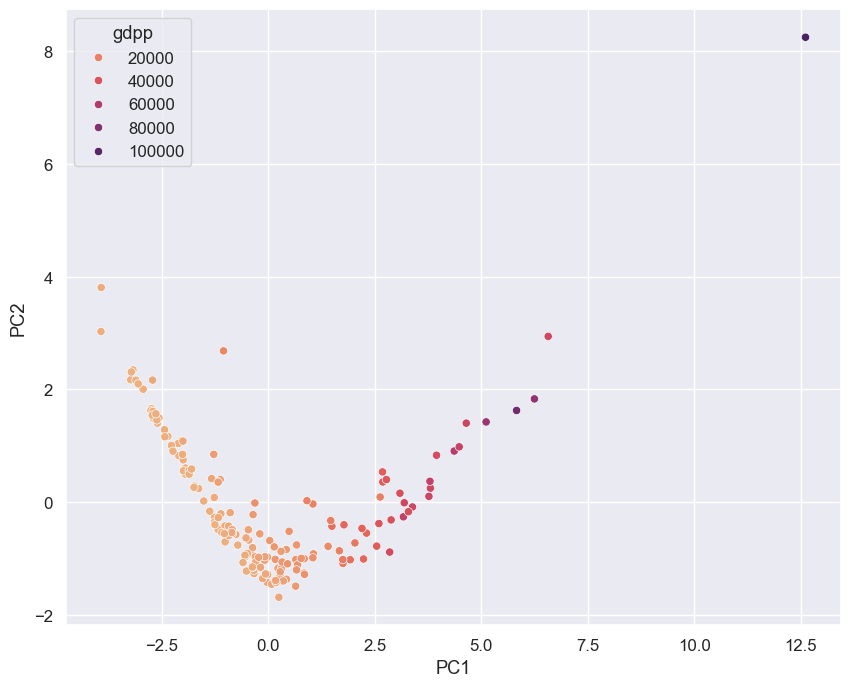

In [93]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df['gdpp'], palette='flare')
plt.show()

## D. Modelling

### D.1 K-Means++ Clustering 🫨🫨🫨🫨🫨

#### K-Means++ Initialization

In [119]:
def init_kmeans_plusplus(X, k, random_state=42):
    np.random.seed(random_state)
    n_samples, n_features = X.shape
    idx_acak = np.random.randint(0, n_samples)
    centroids = [X[idx_acak]]
    
    for i in range(k - 1):
        dists_sq = np.min(np.linalg.norm(X[:, None] - np.array(centroids), axis=2) ** 2, axis=1)
        probs = dists_sq / np.sum(dists_sq)
        next_centroids = X[np.random.choice(len(X), p=probs)]
        centroids.append(next_centroids)
    return np.array(centroids)

#### K-Means Iteration & Convergention

In [120]:
def kmeans_plusplus(df, k, max_iter=1000, tol=1e-4):
    X = df.values
    centroids = init_kmeans_plusplus(X, k)
    
    for i in range(max_iter):
        euclid = np.linalg.norm(X[:, None] - centroids, axis=2)
        labels = np.argmin(euclid, axis=1)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

#### Calculate Within-Cluster Sum of Squares

In [121]:
def calc_wcss(df, k):
    X = df.to_numpy()
    clusters, centroids = kmeans_plusplus(df, k)
    euclid = np.linalg.norm(X[:, None] - centroids, axis=2)
    min_jarak = np.min(euclid, axis=1)
    wcss = np.sum(min_jarak ** 2)
    return wcss

In [122]:
wcss = calc_wcss(df_pca, k=5)
wcss

np.float64(139.41145643563038)

#### Elbow Method (Finding Best K)

In [123]:
def elbow_method(df, maxk=10):
    wcss_values = []
    for k in range(1, maxk + 1):
        wcss = calc_wcss(df, k)
        wcss_values.append(wcss)
        
    plt.plot(range(1, maxk+1), wcss_values, marker='o', linestyle='--')
    plt.title("Mencari K Terbaik (Elbow Method)")
    plt.ylabel("Jumlah Error (WCSS)")
    plt.xlabel("Jumlah K")
    plt.show()

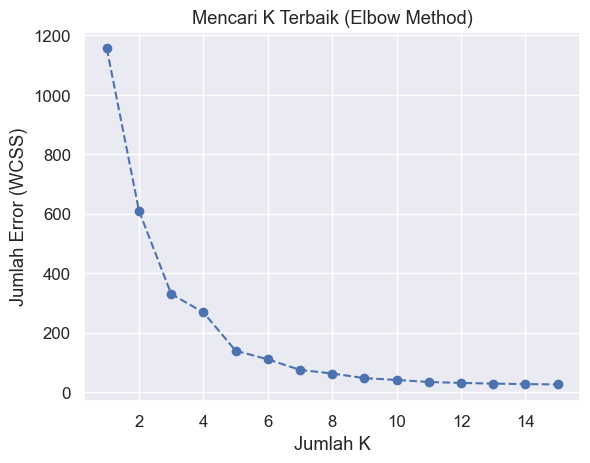

In [124]:
elbow_method(df_pca, 15)

## E. Evaluasi

### E.1 Silhouette Score

#### Calculate Silhouette Score (SScore)

In [125]:
def calc_sscore(df, k):
    clusters, centroids = kmeans_plusplus(df, k)
    sscore = []
    
    for i in range(len(df)):
        ci = clusters[i]
        
        samecp = df[clusters == ci].to_numpy()
        ai = np.mean(np.linalg.norm(samecp - df.iloc[i].to_numpy(), axis=1))
        
        distance_to_otherc = []
        for j in range(k):
            if j != ci:
                othercp = df[clusters == j].to_numpy()
                bi_temp = np.mean(np.linalg.norm(othercp - df.iloc[i].to_numpy(), axis=1))
                distance_to_otherc.append(bi_temp)
        
        bi = min(distance_to_otherc)
        
        sscore_i = (bi - ai) / max(ai, bi)
        sscore.append(sscore_i)
        
    avg_sscore = np.mean(sscore)
    
    return avg_sscore

In [126]:
silhouette = calc_sscore(df_pca, k=4)
silhouette

np.float64(0.45931012405624116)

#### Silhouette Visualization

In [127]:
def sscore(df, maxk=10):
    sscore_values = []
    for k in range(2, maxk + 1):
        score = calc_sscore(df, k)
        sscore_values.append(score)
        
    plt.plot(range(2, maxk + 1), sscore_values, marker='o', linestyle='--')
    plt.title("Visualisasi Akurasi Silhouette")
    plt.ylabel("Akurasi Silhouette")
    plt.xlabel("Jumlah K")
    plt.show()

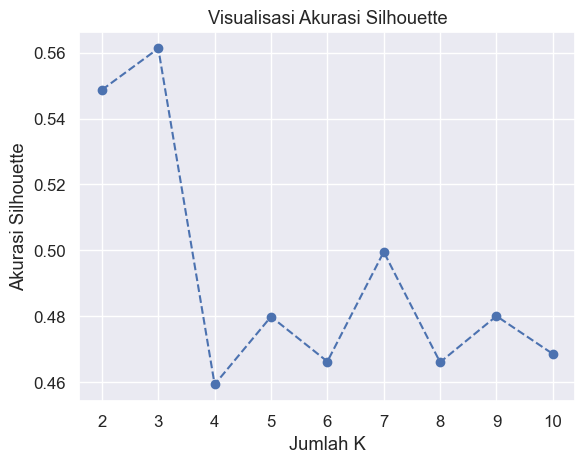

In [128]:
sscore(df_pca, maxk=10)

### E.2 Visualisasi Clusters

In [129]:
clusters, centroids = kmeans_plusplus(df_pca, k=4)
df_pca['clusters'] = clusters
df_pca.head()

,PC1,PC2,clusters
0,-2.627672,1.467853,1
1,-0.024133,-1.425604,3
2,-0.458179,-0.673470,0
3,-2.714466,2.165818,1
4,0.646652,-1.020368,3


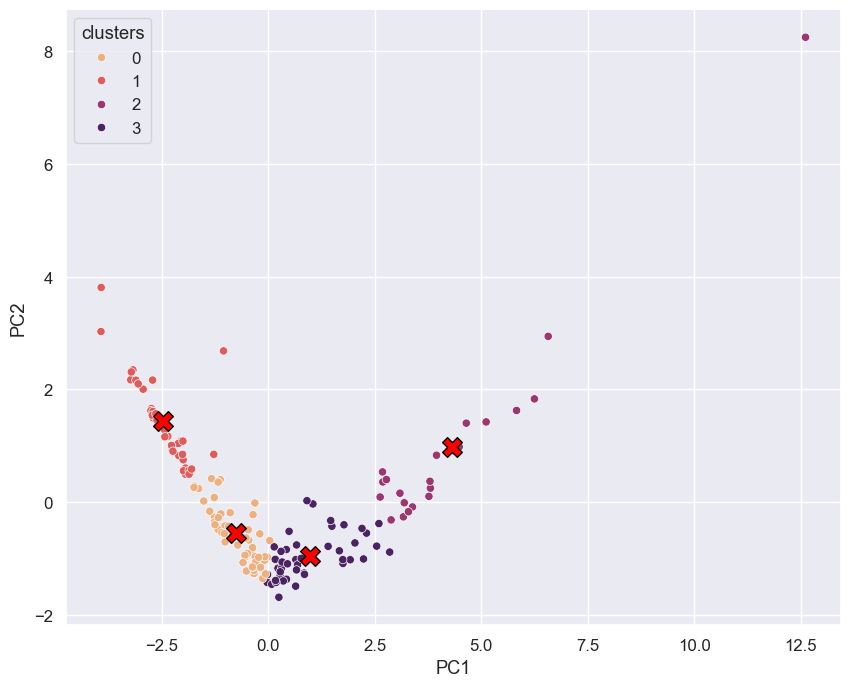

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='clusters', palette='flare')
plt.scatter(
    centroids[:, 0], centroids[:, 1], 
    c='red', marker='X', s=200, 
    label='Centroids', 
    edgecolor='black'
)
plt.show()

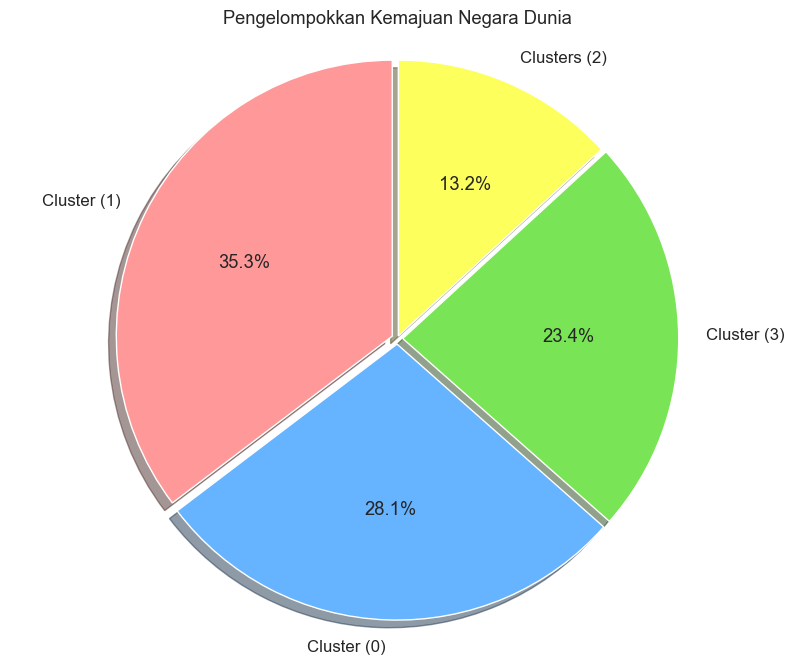

In [131]:
Clusters = df_pca['clusters'].value_counts()

label = ['Cluster (1)', 'Cluster (0)', 'Cluster (3)', 'Clusters (2)']

plt.figure(figsize=(10, 8))
plt.pie(Clusters,
        labels=label,
        autopct = '%1.1f%%',
        startangle=90,
        colors=['#ff9999', '#66b3ff', "#79e456", "#fcff5c"],
        explode=(0.02, 0.02, 0.02, 0.01),
        shadow= True)

plt.title("Pengelompokkan Kemajuan Negara Dunia")
plt.axis('equal')
plt.show()

In [132]:
df['clusters'] = clusters
df_final = df.groupby('clusters')[df.columns].mean(numeric_only=True)
df.head(40)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,1
1,Albania,16.6,1145.2000,267.8950,1987.740,9930,4.490,76.3,1.65,4090,3
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100,1.440,76.8,2.13,12200,3
5,Argentina,14.5,1946.7000,834.3000,1648.000,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,669.7600,141.6800,1458.660,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,10276.2000,4530.8700,10847.100,41400,1.160,82.0,1.93,51900,2
8,Austria,4.3,24059.7000,5159.0000,22418.200,43200,0.873,80.5,1.44,46900,2
9,Azerbaijan,39.2,3171.1200,343.3920,1208.880,16000,13.800,69.1,1.92,5840,0


In [133]:
negara_mapping = {0 : 'Negara Menengah', 1 : 'Negara Berkembang', 2 : 'Negara Sultan', 3 : 'Negara Maju'}
df['country_condition'] = df['clusters'].map(negara_mapping)

In [134]:
df[df['country'] == "Burundi"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,country_condition
26,Burundi,93.6,20.6052,26.796,90.552,764,12.3,57.7,6.26,231,1,Negara Berkembang


In [135]:
df[df['country'] == "Indonesia"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,country_condition
70,Indonesia,33.3,755.73,81.171,696.64,8430,15.3,69.9,2.48,3110,0,Negara Menengah


In [136]:
df[df['country'] == "Japan"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,country_condition
77,Japan,3.2,6675.0,4223.05,6052.0,35800,-1.9,82.8,1.39,44500,3,Negara Maju


In [137]:
df[df['country'] == "Qatar"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,country_condition
123,Qatar,9.0,43796.9,1272.43,16731.4,125000,6.98,79.5,2.07,70300,2,Negara Sultan


In [138]:
df[df['clusters'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clusters,country_condition
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,2,Negara Sultan
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,2,Negara Sultan
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,2,Negara Sultan
23,Brunei,10.5,23792.2,1002.52,9884.0,80600,16.700,77.1,1.84,35300,2,Negara Sultan
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,2,Negara Sultan
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,2,Negara Sultan
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,2,Negara Sultan
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,2,Negara Sultan
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,2,Negara Sultan
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,2,Negara Sultan


## F.GUI

### F.1 Rumus Utama Jarak Euclid

In [139]:
# data_baru = "tes"
# jarak = np.linalg.norm(centroids - data_baru, axis=1)
# cluster_terpilih = np.argmin(jarak)

### F.2 GUI Tkinter

In [140]:
import tkinter as tk
from tkinter import *

kolom_fitur = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
std_mean = df[kolom_fitur].mean(axis=0).to_numpy()
std_std = df[kolom_fitur].std(axis=0).to_numpy()

pca_vector = sorted_vectors[:, :2]

centroids_jarak = centroids

def prediksi():
    child_mort = float(input_child_mort.get())
    exports = float(input_exports.get())
    health = float(input_health.get())
    imports = float(input_imports.get())
    income = float(input_income.get())
    inflation = float(input_inflation.get())
    life_expec = float(input_life_expec.get())
    total_fer = float(input_total_fer.get())
    gdpp = float(input_gdpp.get())
    
    data_input = np.array([child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp])
    
    data_scaled = (data_input - std_mean) / std_std
    
    data_pca = np.dot(data_scaled, pca_vector)
    
    jarak = np.linalg.norm(data_pca - centroids_jarak, axis=1)
    cluster_terpilih = np.argmin(jarak)
    
    if cluster_terpilih == 0:
        teks_hasil = "Negara Menengah"
        warna = "orange"
    elif cluster_terpilih == 1:
        teks_hasil = "Negara Berkembang"
        warna = "red"
    elif cluster_terpilih == 2:
        teks_hasil = "Negara Sultan"
        warna = "yellow"
    else:
        teks_hasil = "Negara Maju" 
        warna = "gold"
    hasil_predict.config(text=f"{teks_hasil}", fg=f"{warna}")
        
        
# GUI UTAMA
root = tk.Tk()
root.title("K-Means ++ Clustering")
root.geometry("700x700")
root.config(bg="#838383")

Header = Frame(root, bg="#3C3C3C")
Header.pack(fill=X)
Judul = Label(Header, text="Country Condition Predictor", font=("Arial", 18, "bold"), bg="#3C3C3C", fg="white")
Judul.pack(pady=(10, 5))
Judul = Label(Header, text="K-Means++ Clustering", font=("Arial", 12, "bold"), bg="#3C3C3C", fg="white")
Judul.pack(pady=(0, 20))

Main = Frame(root, bg="#838383")
Main.pack()
Label(Main, text="Jumlah kematian anak usia di bawah 5 tahun per 1.000 kelahiran hidup", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_child_mort = Entry(Main, width=50)
input_child_mort.pack()

Label(Main, text="Persentase nilai ekspor terhadap Produk Domestik Bruto (GDP)", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_exports = Entry(Main, width=50)
input_exports.pack()

Label(Main, text="Persentase pengeluaran kesehatan terhadap GDP", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_health = Entry(Main, width=50)
input_health.pack()

Label(Main, text="Persentase nilai impor terhadap Produk Domestik Bruto (GDP)", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_imports = Entry(Main, width=50)
input_imports.pack()

Label(Main, text="Pendapatan rata-rata per kapita penduduk", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_income = Entry(Main, width=50)
input_income.pack()

Label(Main, text="Tingkat inflasi tahunan suatu negara (dalam persen)", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_inflation = Entry(Main, width=50)
input_inflation.pack()

Label(Main, text="Angka harapan hidup penduduk (dalam tahun)", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_life_expec = Entry(Main, width=50)
input_life_expec.pack()

Label(Main, text="Total fertility rate, yaitu rata-rata jumlah anak yang dilahirkan oleh seorang wanita", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_total_fer = Entry(Main, width=50)
input_total_fer.pack()

Label(Main, text="Produk Domestik Bruto per kapita (GDP per capita)", bg="#838383", fg="white", font=('Arial', 10, 'bold')).pack(pady=(10,0))
input_gdpp = Entry(Main, width=50)
input_gdpp.pack(pady=(0, 30))


Hasil = Frame(root, bg='#3C3C3C')
Hasil.pack(fill=X)
btn_predict = Button(Hasil, text="Prediksi Kondisi" ,command=prediksi, bg='white', fg='#3C3C3C', font=('Arial', 10, 'bold'))
btn_predict.pack(padx=30, pady=(10, 0))

Label(Hasil, text="Hasil Prediksi:", font=('Arial', 10), fg='white', bg="#3C3C3C").pack(pady=(10,5))
hasil_predict = Label(Hasil, text="-", fg='white', font=('Arial', 16, 'bold'), bg='#3C3C3C')
hasil_predict.pack(pady=(0, 30), padx=30)



root.mainloop()